# Exploratory Data Analysis

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Blues", as_cmap=True)



from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing


In [5]:
cols = ['Loan Identifier', 'Monthly Reporting Period', 'Origination Date', 'Maturity Date']
df = pd.read_csv('../CSV_Files//Final_Clean_Data.csv', index_col=0).drop(cols, axis=1)

In [3]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278657 entries, 0 to 8283488
Data columns (total 17 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   Loan Identifier                     int64         
 1   Monthly Reporting Period            datetime64[ns]
 2   Current Interest Rate               float64       
 3   Original UPB                        int64         
 4   Original Loan Term                  int64         
 5   Origination Date                    datetime64[ns]
 6   Loan Age                            int64         
 7   Maturity Date                       datetime64[ns]
 8   Original Loan to Value Ratio (LTV)  int64         
 9   Number of Borrowers                 int64         
 10  Debt-To-Income (DTI)                int64         
 11  First Time Home Buyer Indicator  

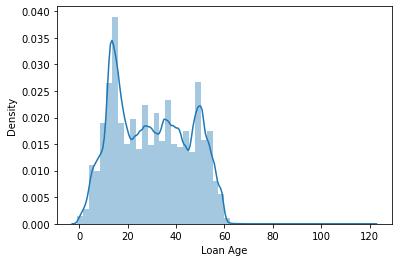

In [4]:
sns_plot = sns.distplot(df['Loan Age'])

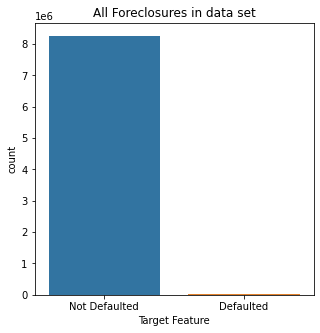

In [6]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df['Foreclosed'], data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '0'
labels[1] = '1'

ax.set_xticklabels(labels)
ax.set_title("All Foreclosures in data set")
ax.set_xlabel('Target Feature')
ax.set_xticklabels(['Not Defaulted', 'Defaulted'])
# use savefig() before show().
plt.savefig("../Notebook_images/distro_of_target")
plt.show()

In [7]:
foreclosed_pct = round(((df['Foreclosed'].value_counts()[1]) / len(df)) * 100, 2)
notforclosed_pct = round(((df['Foreclosed'].value_counts()[0]) / len(df)) * 100, 2)

print(f'Data is imbalanced with {foreclosed_pct}% foreclosed and {notforclosed_pct}% not')

Data is imbalanced with 0.28% foreclosed and 99.72% not


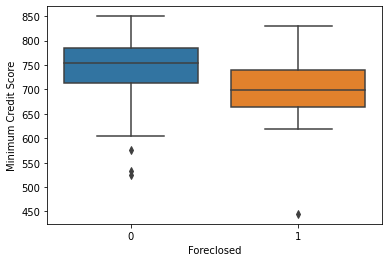

In [10]:
sns.boxplot(x=df['Foreclosed'], y=df['Minimum Credit Score']);
# use savefig() before show().
plt.savefig("../Notebook_images/boxplot_creditscore_and_foreclosed")

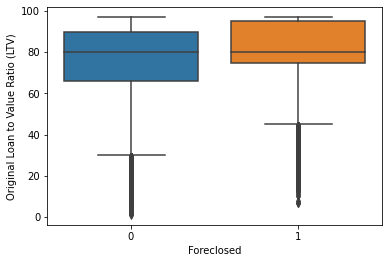

In [8]:
sns.boxplot(x=df['Foreclosed'], y=df['Original Loan to Value Ratio (LTV)']);

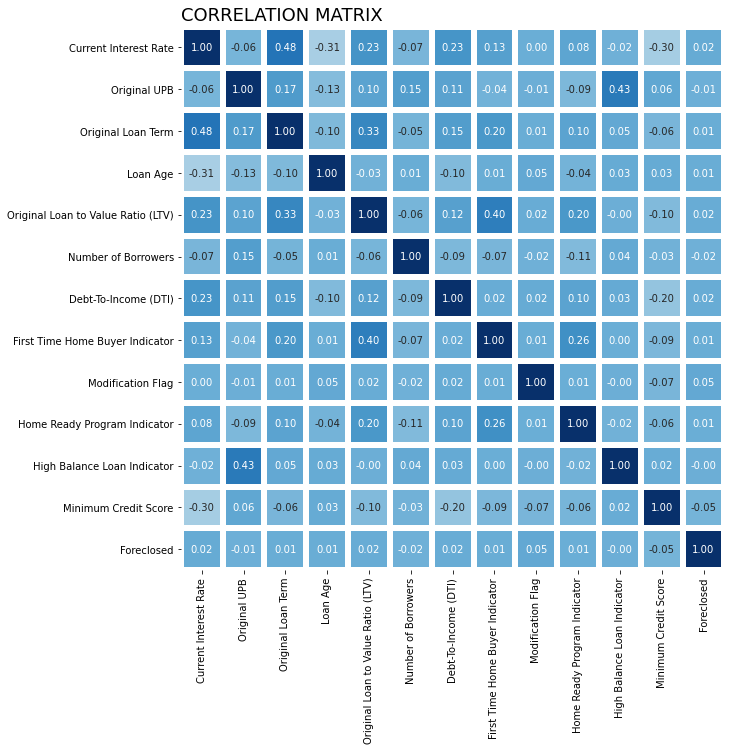

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
# color map

sns.heatmap(df.corr(),annot=True, fmt=".2f", 
           linewidths=5, cmap='Blues', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True, cbar=False)
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
# plt.title('Heatmap displaying the relationship between the features',
#          fontsize=13)
# use savefig() before show().
plt.savefig("../Notebook_images/heatmap")
plt.show()

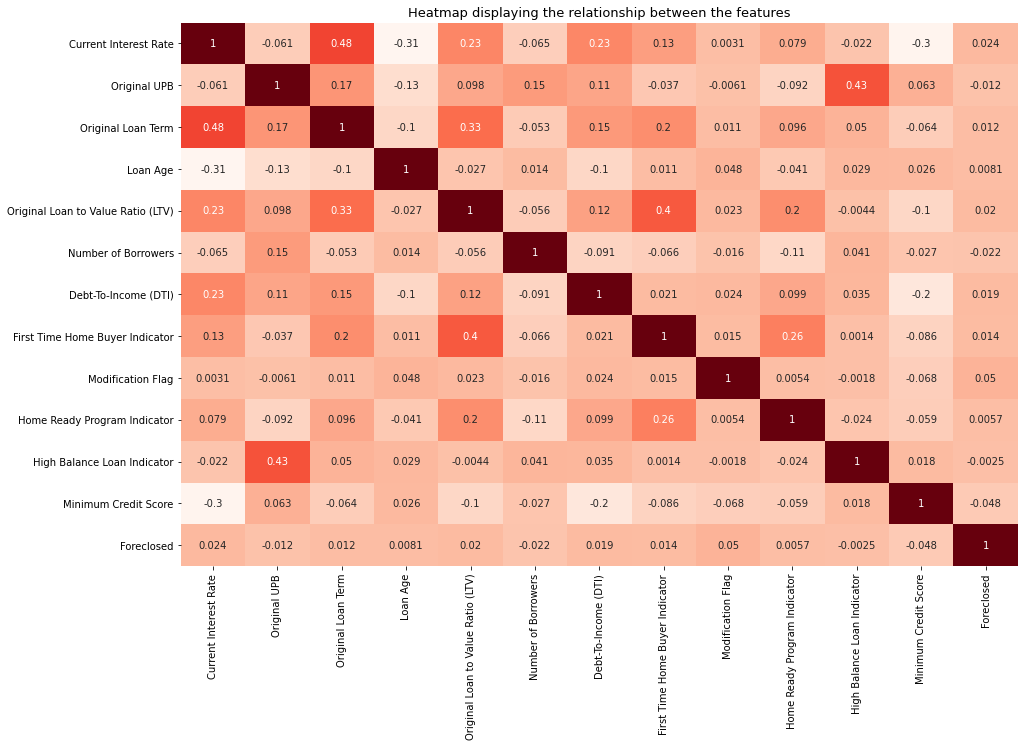

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True, cbar=False)
plt.title('Heatmap displaying the relationship between the features',
         fontsize=13)
# use savefig() before show().
plt.savefig("../Notebook_images/heatmap")
plt.show()

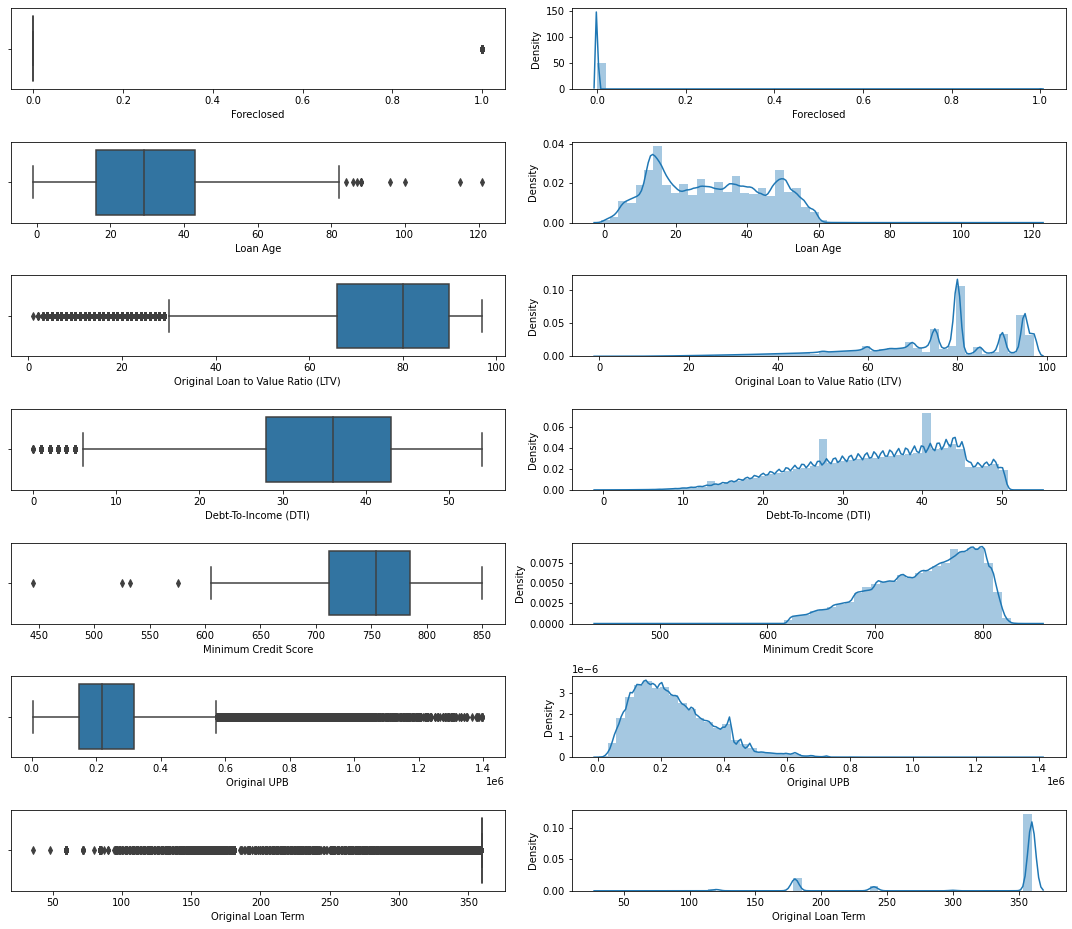

In [6]:

fig, ax = plt.subplots(7,2, figsize = (15, 13))
sns.boxplot(x= df["Foreclosed"], ax = ax[0,0])
sns.distplot(df['Foreclosed'], ax = ax[0,1])
sns.boxplot(x= df["Loan Age"], ax = ax[1,0])
sns.distplot(df['Loan Age'], ax = ax[1,1])
sns.boxplot(x= df["Original Loan to Value Ratio (LTV)"], ax = ax[2,0])
sns.distplot(df['Original Loan to Value Ratio (LTV)'], ax = ax[2,1])
sns.boxplot(x= df["Debt-To-Income (DTI)"], ax = ax[3,0])
sns.distplot(df['Debt-To-Income (DTI)'], ax = ax[3,1])
sns.boxplot(x= df["Minimum Credit Score"], ax = ax[4,0])
sns.distplot(df['Minimum Credit Score'], ax = ax[4,1])
sns.boxplot(x= df["Original UPB"], ax = ax[5,0])
sns.distplot(df['Original UPB'], ax = ax[5,1])
sns.boxplot(x= df["Original Loan Term"], ax = ax[6,0])
sns.distplot(df['Original Loan Term'], ax = ax[6,1])
# plt.subplots_adjust(left=0.125,right=0.9,top=0.9,wspace=0.5,hspace=0.2,bottom=0.1)
plt.tight_layout()
# use savefig() before show().
plt.savefig("../Notebook_images/subplots_boxplot_and_displot")            


<AxesSubplot:xlabel='Original UPB', ylabel='Density'>

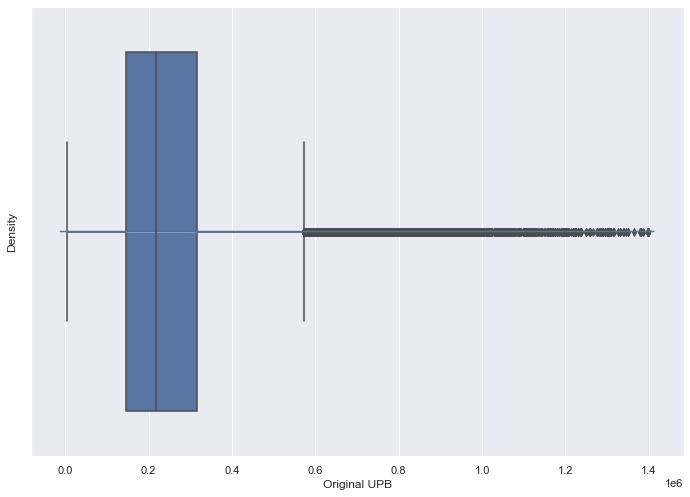

In [16]:
sns.boxplot(x= df["Original UPB"])

<AxesSubplot:xlabel='Original UPB', ylabel='Density'>

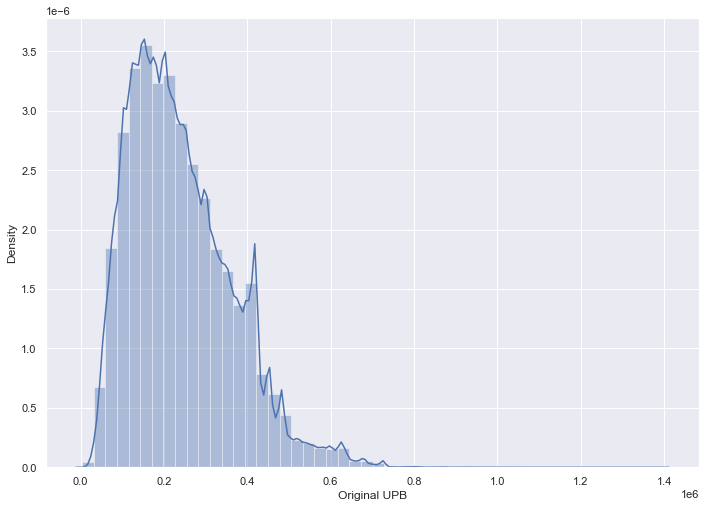

In [17]:
sns.distplot(df['Original UPB'])

In [ ]:
from collections import Counter

from matplotlib import pyplot
from numpy import mean
from numpy import where

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler as ros
from imblearn.under_sampling import RandomUnderSampler as rus
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# define dataset
X = df[['Current Interest Rate',
       'Original UPB', 'Original Loan Term', 'Loan Age', 
       'Original Loan to Value Ratio (LTV)',
       'Number of Borrowers', 'Debt-To-Income (DTI)',
       'First Time Home Buyer Indicator', 'Modification Flag',
       'Home Ready Program Indicator', 'High Balance Loan Indicator',
       'Minimum Credit Score']]

y = df['Foreclosed']

## Random Oversampling

In [6]:
# example of random oversampling to balance the class distribution

# summarize class distribution
print('Current Distribution between foreclosed and not foreclosed')
print(Counter(y))
# define oversampling strategy
oversample = ros(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# summarize class distribution
print('Distribution after oversampling')
print(Counter(y_over))

Current Distribution between foreclosed and not foreclosed
Counter({0: 8255841, 1: 22816})
Distribution after oversampling
Counter({0: 8255841, 1: 8255841})


## Random Undersampling

In [7]:
# Random Under Sampling

# summarize class distribution
print('Current Distribution between foreclosed and not foreclosed')
print(Counter(y))
# define undersample strategy
undersample = rus(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print('Distribution after undersamping')
print(Counter(y_over))

Current Distribution between foreclosed and not foreclosed
Counter({0: 8255841, 1: 22816})
Distribution after undersamping
Counter({0: 22816, 1: 22816})


## Combined Random Oversampling and Undersampling

In [ ]:
# Combining Random Oversampling and Undersampling

# summarize class distribution
print(Counter(y))
# define oversampling strategy
over = ros(sampling_strategy=0.1)
# fit and apply the transform
X_over, y_over = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = rus(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

In [9]:
# example of evaluating a model with random oversampling and undersampling

# define pipeline
over = ros()
under = rus()
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.990


In [12]:
# Feature Importance with Extra Trees Classifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
print(model.feature_importances_)

[0.12377675 0.14002646 0.01817263 0.14190676 0.10865265 0.04362545
 0.13114063 0.01071667 0.02653024 0.00572277 0.0025095  0.24721948]


In [13]:
# Feature Selection with RFE


# load data

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 3
Selected Features: [ True False False False False  True False False  True False False False]
Feature Ranking: [ 1 10  9  6  7  1  5  2  1  4  3  8]


In [14]:
# Feature Selection with Univariate Statistical Tests



# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[116786.3    31102.733  35979.195  14139.421  84450.638 102712.995
  79725.354  34983.636  81868.434   5717.759   1305.65  447174.341]
[[  4.125  90.      2.    802.   ]
 [  4.875  48.      1.    791.   ]
 [  5.5    80.      1.    749.   ]
 [  5.25   77.      1.    731.   ]
 [  2.99   58.      1.    802.   ]]


In [16]:
# Evaluate using Cross Validation

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 71.784% (0.175%)


In [6]:
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 99.725%


In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification


# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    pipeline = Pipeline(steps=[('over', over), ('model', model)])
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))